# Week 3
## Classification and Representation
### Classification
- Logistic regression is used for classification
- **Binary classification problem:**
    - $y\in \{0,1\}$
        - 0: "Negative Class" (or "-"; often the absence of something we are looking for)
        - 1: "Positive Class" (or "+"; often the presence of something we are looking for)

### Hypothesis Representation
- By plugging our "old" hypothesis function $\theta^T x$ into the **logistic function**, we get the new hypothesis for logistic regression
- The Logistic function is also called **sigmoid function**
- $h_{\theta}(x) = g(\theta^T x)$
    - Where $g(z)=\frac{1}{1+e^{-z}}$
    - And $z=\theta^T x$ in this case
- $h_{\theta}(x)$ will give us the **probability** that our output is **1**
- $h_{\theta}(x) = P(y=1|x;\theta)=1-P(y=0|x;\theta)$
    - Because of: $P(y=0|x;\theta) + P(y=1|x;\theta)=1$ 

<IPython.core.display.Javascript object>


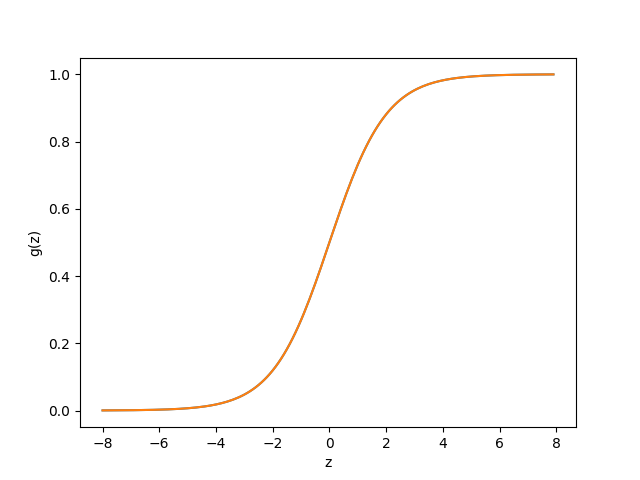

In [4]:
%matplotlib notebook

import matplotlib.pylab as plt
import numpy as np
x = np.arange(-8, 8, 0.1)
f = 1 / (1 + np.exp(-x))
plt.plot(x, f)
plt.xlabel('z')
plt.ylabel('g(z)')
plt.show()

- The sigmoid function runs between 1 and 0

### Decision Boundary
- Let's say, output greater than or equal to $0.5$ is mapped to $1$ and otherwise to $0$:
    - $h_{\theta}(x) \geq 0.5 \rightarrow y=1$
    - $h_{\theta}(x)<0.5 \rightarrow y=0$
- $h_{\theta}(x) \Longleftrightarrow g(\theta^T x)$
    - For $g(\theta^T x)$ to be greater than or equal to $0.5$ this means:
        - $\theta^T x \geq 0$ (as the plot for the sigmoid function above shows)
            - We get:
                - $\theta^T x \geq 0 \rightarrow y=1$
                - $\theta^T x < 0 \rightarrow y=0$
- The **decision boundary** is the line that separates the area where $y=0$ and where $y=1$
- **Example:**
    - $\theta = \begin{bmatrix}5 \\ -1 \\ 0\end{bmatrix}$
    - $y=1$ if $5+(-1)x_1+0x_2\geq 0 \rightarrow y=1$ if $x_1 \leq 5$
    - So the decision boundary is a straight verical line placed on the graph where $x_1 = 5$
        - Everything to the left of that denotes $y=1$
        - Everything to the right detones $y=0$
- *Note:* The input to the sigmoid function (e.g. $\theta^T x$) doesn't need to be linear, and could be a function that describes a circle (e.g. $\theta_0 + \theta_1 x_1^2 + \theta_2 x_2^2$) or any shape to fit our data

## Logistic Regression Model
### Cost Function
- We cannot use the same cost function that we use for linear regression because the logistic function will cause the ouput to be wavy, causing many local optima. In other words, it will not be a **convex** function
$$J(\theta)=\frac{1}{m}\sum_{i=1}^{m}Cost(h_{\theta}(x^{(i)}),y^{(i)})$$
$$Cost(h_{\theta}(x),y)=-log(h_\theta(x)) \quad if \; y=1$$  
$$Cost(h_{\theta}(x),y)=-log(1-h_\theta(x)) \quad if \; y=0$$  
- Cost examples:
    - $Cost(h_\theta(x),y)=0 \; if \; h_\theta(x)=y$
    - $Cost(h_\theta(x),y)\rightarrow \infty \; if \; y=0 \; and \; h_\theta(x) \rightarrow 1$
    - $Cost(h_\theta(x),y)\rightarrow \infty \; if \; y=1 \; and \; h_\theta(x) \rightarrow 0$

<IPython.core.display.Javascript object>


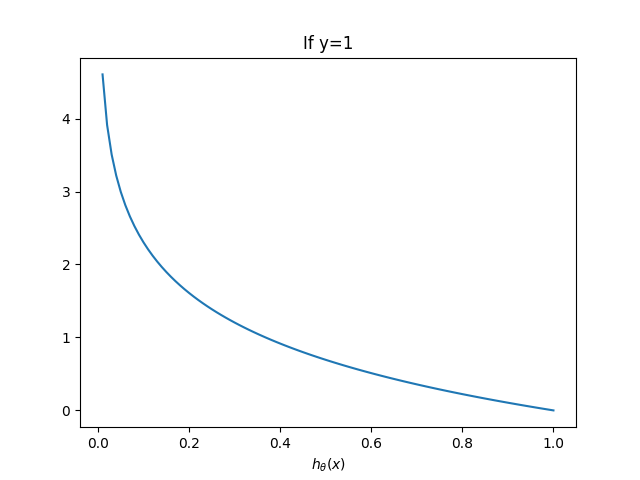

In [16]:
%matplotlib notebook

x = np.arange(0.01, 1.01, 0.01)
f = -np.log(x)
plt.plot(x, f)
plt.xlabel(r'$h_\theta(x)$')
plt.title('If y=1')
plt.show()

<IPython.core.display.Javascript object>


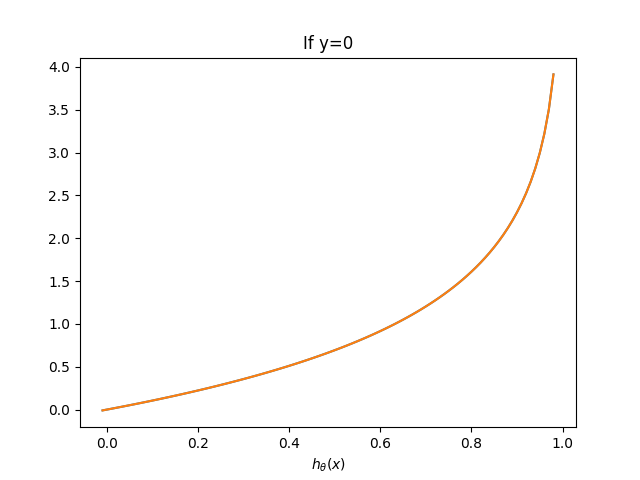

In [25]:
%matplotlib notebook

x = np.arange(-0.01, 0.99, 0.01)
f = -np.log(1-x)
plt.plot(x, f)
plt.xlabel(r'$h_\theta(x)$')
plt.title('If y=0')
plt.show()

### Simplified Cost Function and Gradient Descent
#### Simplified Cost Function
$$J(\theta)=-\frac{1}{m}\sum_{i=1}^{m}[y^{(i)}log(h_\theta(x^{(i)}))+(1-y^{(i)})log(1-h_\theta(x^{(i)}))]$$  
- **Vectorized implementation:**
    - $h=g(X\theta)$  
    - $J(\theta)=\frac{1}{m}(-y^T log(h)-(1-y)^T log(1-h))$

#### Gradient Descent
- General form:
    - $\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j}J(\theta)$
- Worked out derivative:
    - $\theta_j := \theta_j - \frac{\alpha}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}$
- Vectorized implementation:
    - $\theta := \theta - \frac{\alpha}{m}X^T (g(X\theta)-\vec y)$  
- *Note:* feature scaling can and **should** also be applied when using gradient descent for logistic regression
    
### Advanced Optimization
- More sophisticated, faster ways to optimize $\theta$ (also no need to pick $\alpha$):
    - **Conjugate gradient**
    - **BFGS**
    - **L-BFGS**
- We first need to provide a function that evaluates the folowwing two functions for a given input value $\theta$:
    - $J(\theta)$
    - $\frac{\partial}{\partial \theta_j}J(\theta)$
- Octave/Matlab code using **fminunc()**:  

```
function [jVal, gradient] = costFunction(theta)
  jVal = [...code to compute J(theta)...];
  gradient = [...code to compute derivative of J(theta)...];
end

options = optimset('GradObj', 'on', 'MaxIter', 100);
initialTheta = zeros(2,1);
[optTheta, functionVal, exitFlag] = fminunc(@costFunction, initialTheta, options);
```

## Multiclass Classification: One-vs-all
- We are basically choosing one class and the lumping all the others into a single second class
- We do this repeatedly, applying binary logistic regression to each case, and then use the hypothesis that returned the highest value as our prediction
- Formal:
    - $y\in \{0,1\dots n\}$
    - $h_{\theta}^{(0)}(x) = P(y=0|x;\theta)$
    - $h_{\theta}^{(1)}(x) = P(y=1|x;\theta)$
    - $\dots$
    - $h_{\theta}^{(n)}(x) = P(y=n|x;\theta)$
    - $prediction = \max\limits_{i}(h_\theta^{(i)}(x))$

<IPython.core.display.Javascript object>


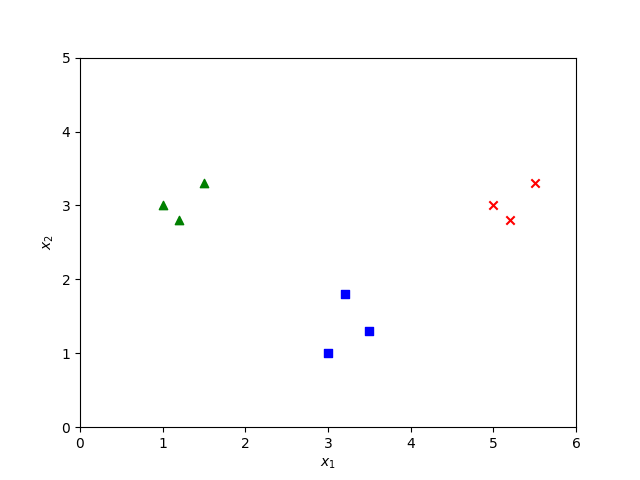

In [42]:
%matplotlib notebook

axes = plt.gca()
axes.set_xlim([0,6])
axes.set_ylim([0,5])

x1 = np.array([1,1.2,1.5])
y1 = np.array([3,2.8,3.3])
plt.scatter(x1, y1, c='g', marker='^')

x2 = np.array([3,3.2,3.5])
y2 = np.array([1,1.8,1.3])
plt.scatter(x2, y2, c='b', marker='s')

x3 = np.array([5,5.2,5.5])
y3 = np.array([3,2.8,3.3])
plt.scatter(x3, y3, c='r', marker='x')

plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.show()

- The above plot will then turn into this one for $h_{\theta}^{(0)}$:

<IPython.core.display.Javascript object>


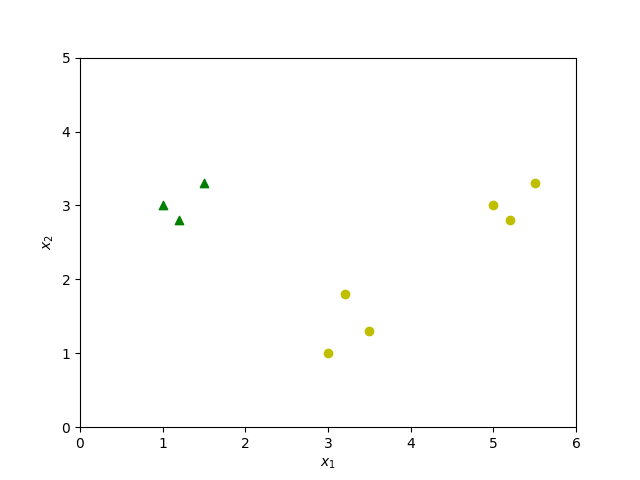

In [43]:
%matplotlib notebook

axes = plt.gca()
axes.set_xlim([0,6])
axes.set_ylim([0,5])

plt.scatter(x1, y1, c='g', marker='^')
plt.scatter(x2, y2, c='y', marker='o')
plt.scatter(x3, y3, c='y', marker='o')

plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.show()

## Solving the Problem of Overfitting
### The Problem of Overfitting
- **Underfitting**, or high bias, is when the form of our hypothesis function h maps poorly to the trend of the data
    - Usually caused by a function that is too simple or uses too few features
- **Overfitting**, or high variance, is caused by a hypothesis function that fits the available data but does not generalize well to predict new data
    - Usually caused by a complicated function that creates a lot of unnecessary curves and angles unrelated to the data
- Solution to overfitting:
    - Reduce the number of features:
        - Manually select which features to keep
        - Use a model selection algorithm (studied later in the course)
    - Regularization:
        - Keep all the features, but reduce the magnitude of parameters $\theta_j$
        - Regularization works well when we have a lot of slightly useful features

### Cost Function (Regularization)
- Say we wanted to make the following function more quadratic (because it's overfitting):
    - $\theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3 + \theta_4 x^4$
- We'll want to eliminate the influence of $\theta_3 x^3$ and $\theta_4 x^4$
- We do this by modifying the cost function
    - $\min_\theta \frac{1}{2m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2+\color{red}{\lambda \sum_{j=1}^n \theta_j^2}$
    - The red term is added, so it can penalize all parameters (except the $\theta_0$ parameter, which in practice doesn't need to be penalized)
    - By doing this, we can smooth out the output of our hypothesis function to reduce overfitting
    - $\lambda$ is the **regularization parameter** and shouldn't be too big or too small
    
### Regularized Linear Regression
#### Gradient Descent
$$\theta_0 := \theta_0 - \alpha \frac{1}{m}\sum_{i=1}^m (h_\theta (x^{(i)})- y^{(i)})x_0^{(i)}$$
$$\theta_j := \theta_j - \alpha [(\frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)})+\frac{\lambda}{m}\theta_j] \quad j\in \{1,2\dots n\}$$  
- $\theta_0$ is seperated out from the rest, because we don't want to penalize $\theta_0$
- The term $\frac{\lambda}{m}\theta_j$ performs our regularization
- With some manipulation our update rule can look like this:
    - $\theta_j := \theta_j(1-\alpha \frac{\lambda}{m})-\alpha\frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}$
        - The first term will always be less than 1, so we are reducing the value of $\theta_j$ by some amount on every update
        - The second term stays the same

#### Normal Equation
$$\theta=(X^T X+\lambda\dot L)^{-1}X^T y$$  
$$L = \begin{bmatrix}0 & & & & \\ & 1 & & & \\ & & 1 & & \\ & & & \ddots \\ & & & & 1\end{bmatrix}$$
- L is a (n+1) x (n+1) matrix
- It's similar to the identity matrix, but the first entry is a zero (because we are not including $x_0$)
- $X^T X$ is non-invertible for $m<n$, but $X^T X + \lambda\cdot L$ is always invertible

### Regularized Logistic Regression
#### Cost Function
$$J(\theta)=-\frac{1}{m}\sum_{i=1}^m [y^{(i)} log(h_\theta (x^{(i)}))+(1-y^{(i)})log(1-h_\theta (x^{(i)}))] + \color{red}{\frac{\lambda}{2m}\sum_{j=1}^n \theta_j^2}$$  
- In this case, $\theta_0$ is also excluded

#### Gradient Descent
$$\theta_0 := \theta_0 - \alpha \frac{1}{m}\sum_{i=1}^m (h_\theta (x^{(i)})- y^{(i)})x_0^{(i)}$$
$$\theta_j := \theta_j - \alpha [(\frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)})+\frac{\lambda}{m}\theta_j] \quad j\in \{1,2\dots n\}$$  
- Looks like gradient descent for linear regression, but $h_\theta$ is different
- Octave/Matlab code using **fminunc()**:  

```
function [jVal, gradient] = costFunction(theta)
  jVal = [...code to compute J(theta)...];
  gradient(1) = [...code to compute partial derivative of J(theta) with respect to theta_0...];
  gradient(2) = [...code to compute partial derivative of J(theta) with respect to theta_1...];
  ...
  gradient(n+1) = [...code to compute partial derivative of J(theta) with respect to theta_n...];
end
```